Introduction 📝¶
🎯 Goal: This project involves using a Long Short-Term Memory (LSTM) neural network to predict Apple stock prices. The LSTM model is trained on historical stock data to forecast future prices based on past trends.

📖 Data:

aapl_stock_data.csv - Historical Stock Price Dataset from Yahoo Finance

Date - The date of the stock data.
Open - The opening price of the stock.
High - The highest price of the stock.
Low - The lowest price of the stock.
Close - The closing price of the stock.
Adj Close - The adjusted closing price of the stock.
Volume - The trading volume.
💻 Model Architecture:

🔧 The LSTM model is built using TensorFlow and Keras libraries and includes the following layers:

🔁 Two LSTM Layers: Each with 50 units to capture the sequence-based relationships in the stock data.
🛡️ Dropout Layers: Added to prevent overfitting by randomly setting a portion of input units to 0 during training.
🎯 Dense Output Layer: A single unit to predict the stock price with precision.
🧠 Evaluation metric: Root Mean Squared Error (RMSE)


Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import warnings
from rich.theme import Theme
from matplotlib.lines import Line2D
from rich.console import Console
from rich import print
warnings.filterwarnings('ignore')

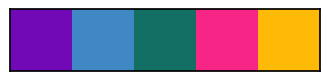

In [2]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

def custom_palette(custom_colors):
    customPalette = sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors),size=0.8)
    plt.tick_params(axis='both', labelsize=0, length = 0)

palette = ["#7209B7","#3F88C5","#136F63","#F72585","#FFBA08"]
palette2 = sns.diverging_palette(120, 220, n=20)
custom_palette(palette)

custom_theme = Theme({
    "info" : "italic bold cyan",
    "warning": "italic bold magenta",
    "danger": "bold blue"
})

console = Console(theme=custom_theme)

In [3]:
data = pd.read_csv('/content/aapl_us_d.csv')
df=data

In [4]:
data


,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.100763,0.101999,0.099546,0.100763,9.767604e+07
1,1984-09-10,0.100763,0.101071,0.098340,0.100165,7.581254e+07
2,1984-09-11,0.101071,0.103814,0.101071,0.101999,1.787705e+08
3,1984-09-12,0.101999,0.102597,0.098928,0.098928,1.561713e+08
4,1984-09-13,0.104432,0.104730,0.104432,0.104432,2.432310e+08
...,...,...,...,...,...,...
10075,2024-08-30,230.190000,230.400000,227.480000,229.000000,5.299077e+07
10076,2024-09-03,228.550000,229.000000,221.170000,222.770000,5.019057e+07
10077,2024-09-04,221.660000,221.780000,217.480000,220.850000,4.384020e+07
10078,2024-09-05,221.625000,225.480000,221.520000,222.380000,3.661540e+07


EDA 📊

📂 Loading the Dataset:

Read the CSV file: Load the Apple stock data (aapl_us_d.csv) using pandas.
 Display the first few rows to get a glimpse of the dataset structure.

Summary Statistics: Generate summary statistics for each feature to gain insight into the distribution of values and overall trends in Tesla's stock data.

Checking for Missing Values: Identify any missing data that might need to be cleaned or handled to ensure accurate analysis.

📊 Data Visualization:

📉 Line Plot of Closing Prices: Visualize the trend of Tesla’s closing stock prices over time to track how the stock fluctuates and identify any potential patterns.

📊 Histogram of Closing Prices: Analyze the distribution of closing prices to see how often certain price ranges occur and detect any skewness or outliers.

🔥 Correlation Heatmap: Use a heatmap to understand the correlations between different stock features (e.g., Open, Close, High, Low, Volume)
🔗 Scatter Plot (Open vs. Close Prices): Explore the relationship between Tesla's opening and closing prices. Identify if there’s a strong correlation between these features.

📈 Histogram of Daily Returns: Analyze the distribution of Tesla’s daily returns to get a sense of stock volatility and how often the stock price changes.

📊 Moving Averages: Plot the 50-day and 200-day moving averages along with closing prices to help identify longer-term trends and smooth out short-term fluctuations.

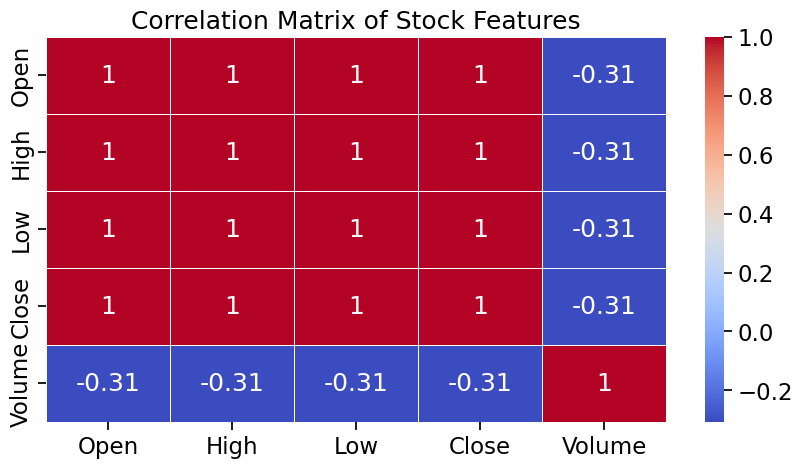

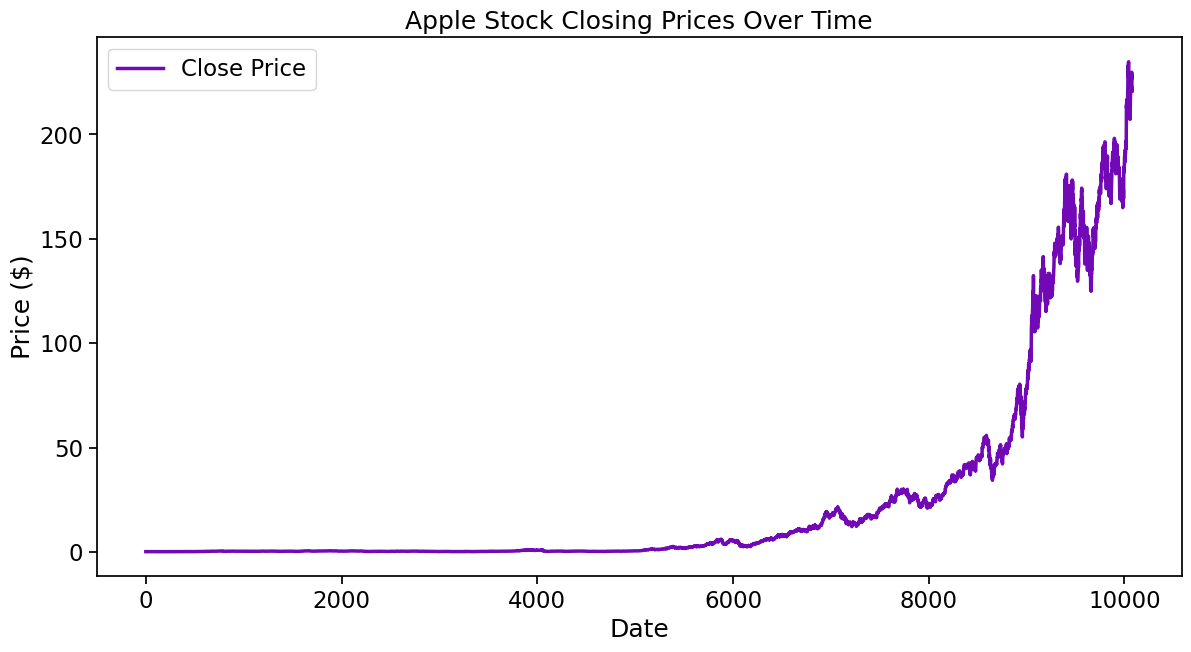

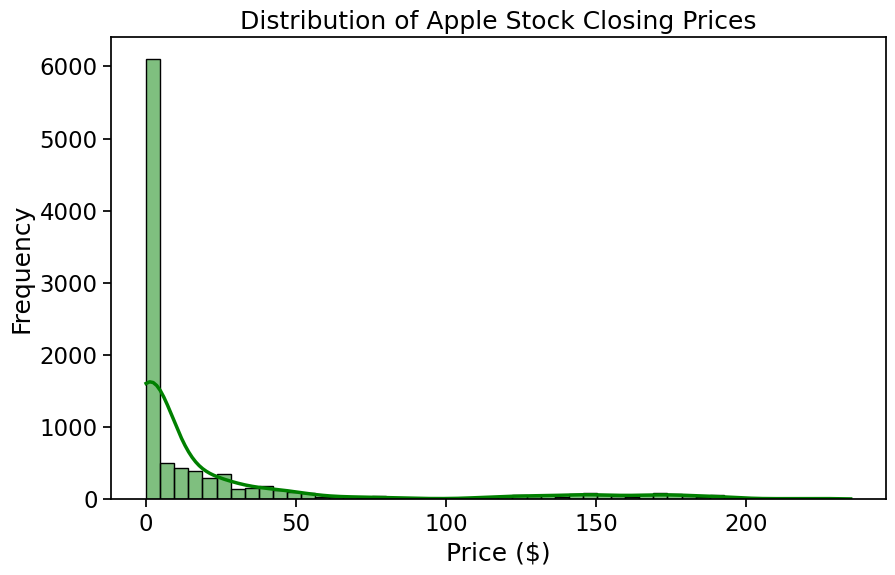

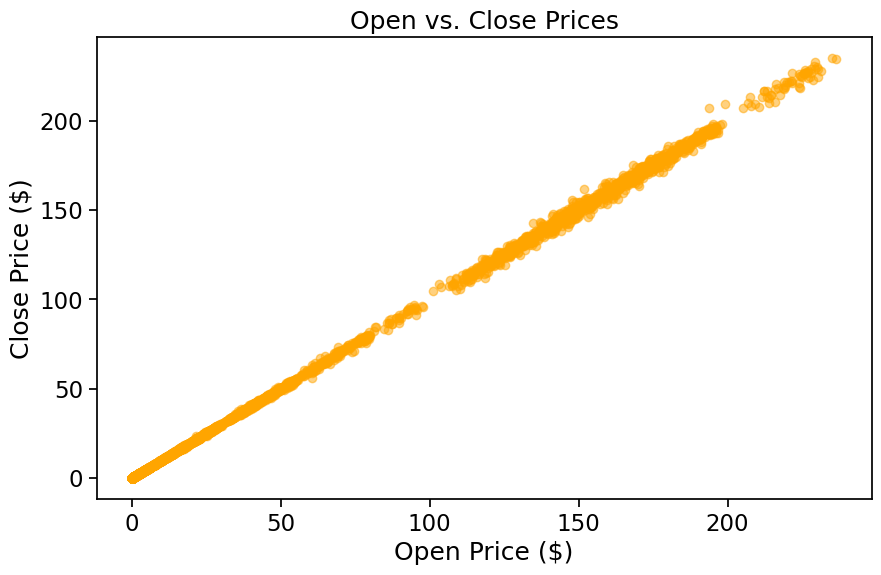

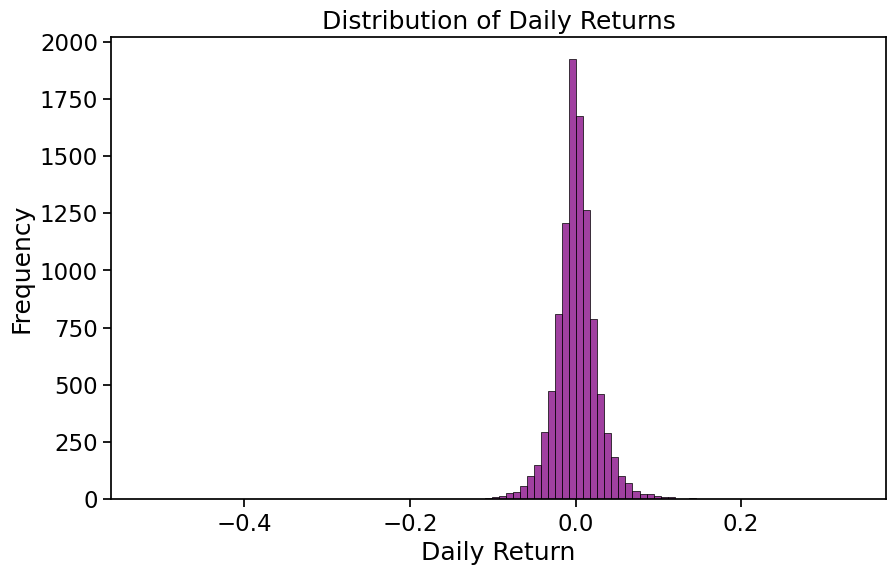

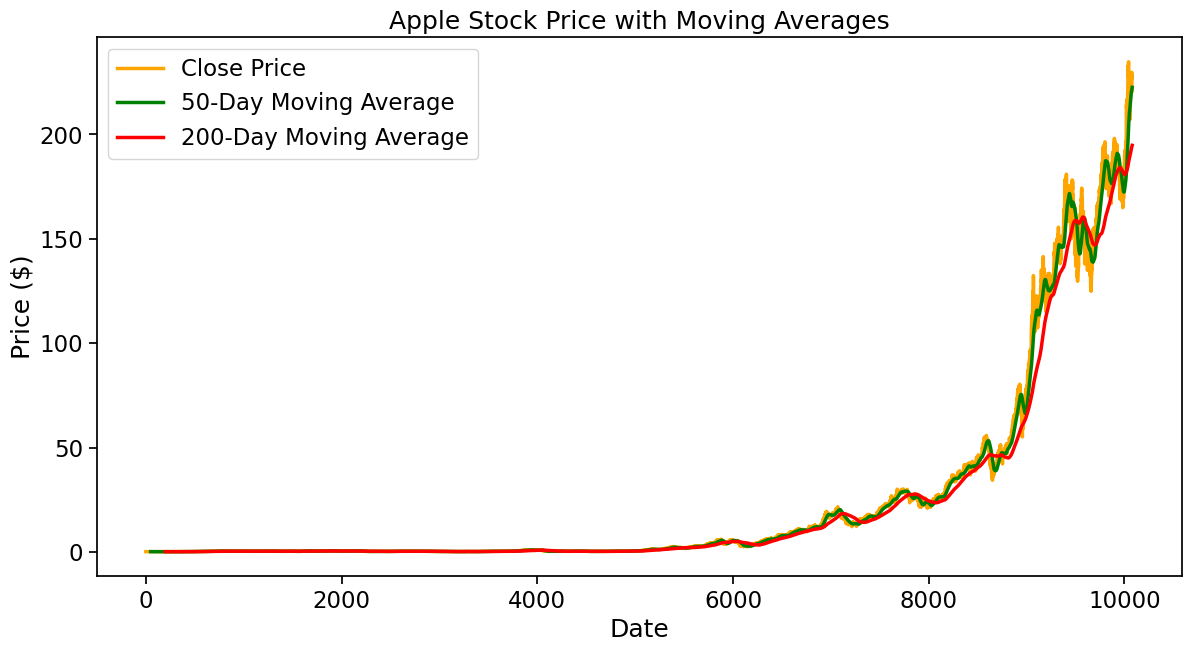

In [5]:
# Customized color palette for the graphs
plt.figure(figsize=(10, 5))
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Stock Features')
plt.show()

# Plot the closing price over time (blue line)
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.title('Apple Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Plot the distribution of the closing prices (green histogram with mako palette)
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], bins=50, kde=True, color='green')
plt.title('Distribution of Apple Stock Closing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between Open and Close prices (orange scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(data['Open'], data['Close'], alpha=0.5, color='orange')
plt.title('Open vs. Close Prices')
plt.xlabel('Open Price ($)')
plt.ylabel('Close Price ($)')
plt.show()

# Visualize daily returns
df['Daily Return'] = df['Close'].pct_change()
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Return'].dropna(), bins=100, color='purple')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

# Plot the moving averages (red for close, green for 50-day MA, blue for 200-day MA)
plt.figure(figsize=(14, 7))
data['Close'].plot(label='Close Price', color='orange')
data['MA50'] = data['Close'].rolling(50).mean()
data['MA200'] = data['Close'].rolling(200).mean()
data['MA50'].plot(label='50-Day Moving Average',color='green')
data['MA200'].plot(label='200-Day Moving Average',color='red')
plt.title('Apple Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

Pre-processing 🛠️

In [6]:
close_price = data['Close'].values

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])

# Convert the scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=['Open', 'High', 'Low', 'Close', 'Volume'])

In [8]:
# Creating sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
       # Create a sequence of data from day 'i' to 'i + seq_length - 1'
        X.append(data.iloc[i:i + seq_length].values)

        # The target value is the stock price for the day immediately after the sequence
        y.append(data.iloc[i + seq_length]['Close'])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 25

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

# Reshape X to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

Splitting the data into training and testing sets

In [9]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.90)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [10]:
print(y_test.shape)

(1006,)

In [11]:
print(X_train.shape)

(9049, 25, 5)

Baseline LSTM model ⚙️

In [12]:
# Build the LSTM model
model = Sequential()

# First LSTM layer with Dropout regularization
model.add(LSTM(units=150, return_sequences=True, input_shape=(60, 5)))
model.add(Dropout(0.3))

# Second LSTM layer with Dropout regularization
model.add(LSTM(units=150, return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer without return_sequences
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Fully connected Dense layer
model.add(Dense(units=25, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model with Adam optimizer and mean squared error loss
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Set up early stopping and model checkpoint with .keras format
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

# Display the model summary
model.summary()

# Fit the model to the training data
# Assume X_train and y_train are already defined and preprocessed
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 150)             │          93,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 150)             │         180,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,701 (1.20 MB)

 Trainable params: 315,701 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 37s 124ms/step - loss: 7.8551e-05 - val_loss: 0.0014
Epoch 2/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 40s 121ms/step - loss: 2.2204e-05 - val_loss: 6.6658e-04
Epoch 3/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 41s 121ms/step - loss: 1.8467e-05 - val_loss: 0.0031
Epoch 4/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 41s 119ms/step - loss: 1.9165e-05 - val_loss: 0.0011
Epoch 5/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 42s 123ms/step - loss: 1.7170e-05 - val_loss: 0.0018
Epoch 6/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 41s 123ms/step - loss: 1.7200e-05 - val_loss: 0.0023
Epoch 7/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 45s 139ms/step - loss: 1.6230e-05 - val_loss: 0.0027
Epoch 8/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 28s 122ms/step - loss: 2.0133e-05 - val_loss: 0.0038
Epoch 9/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 41s 120ms/step - loss: 1.8122e-05 - val_loss: 0.0026
Epoch 10/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 41s 121ms/step - loss: 1.7053e-05 - val_loss: 0.0038
Epoch 11/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 42s 126ms/step - loss: 1

Improved LSTM model ⚙️

Results 📝

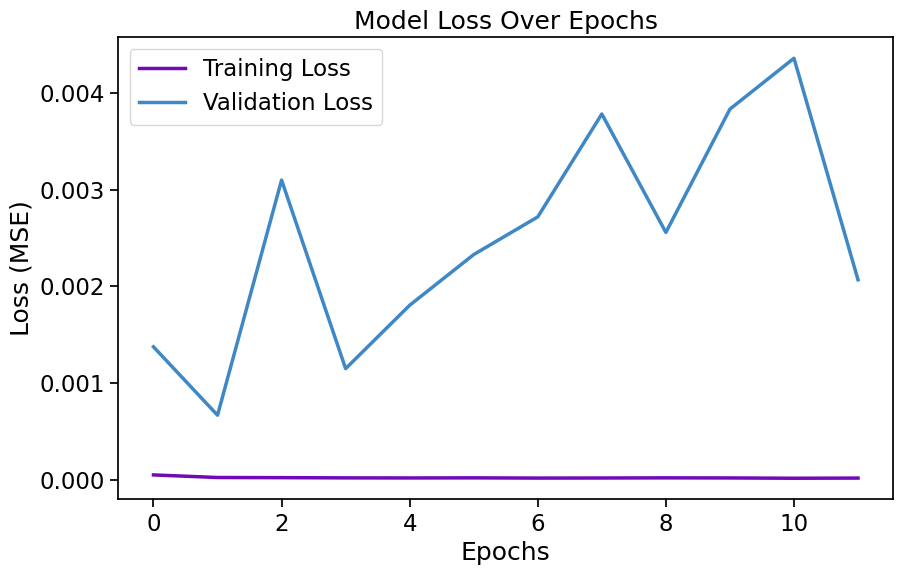

Final Training Loss (MSE): 0.0000

Final Validation Loss (MSE): 0.0021

Final Training RMSE: 0.0040

Final Validation RMSE: 0.0455

Test Loss (MSE): 0.0731

Test RMSE: 0.2703

In [13]:
# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Print the final training and validation loss
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]
print(f'Final Training Loss (MSE): {train_loss:.4f}')
print(f'Final Validation Loss (MSE): {val_loss:.4f}')

# Calculate RMSE on the training and validation sets
train_rmse = np.sqrt(train_loss)
val_rmse = np.sqrt(val_loss)
print(f'Final Training RMSE: {train_rmse:.4f}')
print(f'Final Validation RMSE: {val_rmse:.4f}')

# If you have test data, evaluate the model on the test set
# Assume X_test and y_test are already defined and preprocessed
test_loss = model.evaluate(X_test, y_test, verbose=0)
test_rmse = np.sqrt(test_loss)
print(f'Test Loss (MSE): {test_loss:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


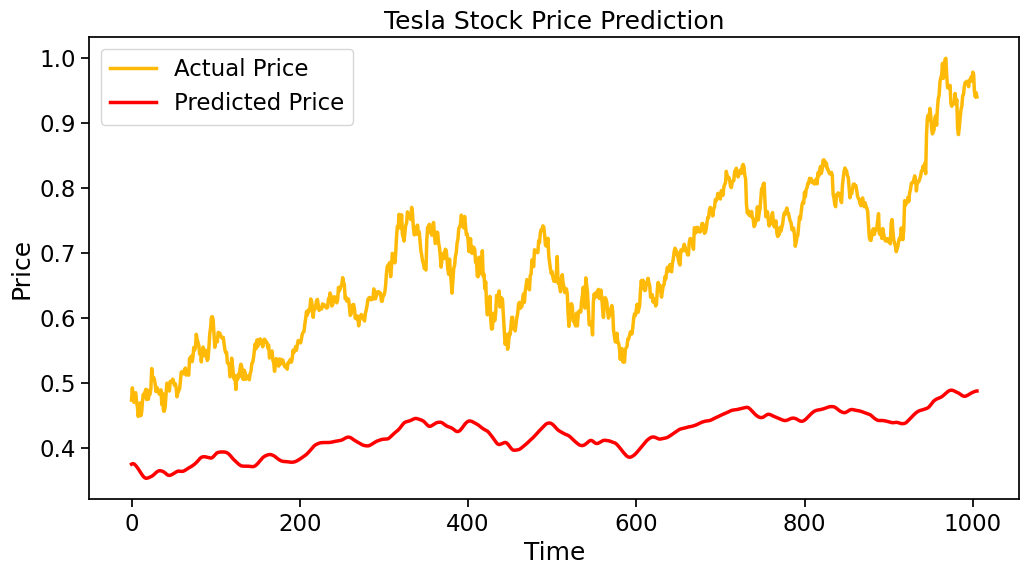

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Price', color= palette[4])
plt.plot(model.predict(X_test), label='Predicted Price', color='red')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()